# Hourly Energy Consumption Forcasting

# Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb


# Data Exploration

In [2]:
df=pd.read_csv('PJMW_hourly.csv')
df.head()

,Datetime,PJMW_MW
0,2002-12-31 01:00:00,5077.0
1,2002-12-31 02:00:00,4939.0
2,2002-12-31 03:00:00,4885.0
3,2002-12-31 04:00:00,4857.0
4,2002-12-31 05:00:00,4930.0


In [3]:
df.dtypes

Datetime     object
PJMW_MW     float64
dtype: object

In [4]:
df=df.set_index('Datetime')
df.head()

,PJMW_MW
Datetime,
2002-12-31 01:00:00,5077.0
2002-12-31 02:00:00,4939.0
2002-12-31 03:00:00,4885.0
2002-12-31 04:00:00,4857.0
2002-12-31 05:00:00,4930.0


In [5]:
df.index

Index(['2002-12-31 01:00:00', '2002-12-31 02:00:00', '2002-12-31 03:00:00',
       '2002-12-31 04:00:00', '2002-12-31 05:00:00', '2002-12-31 06:00:00',
       '2002-12-31 07:00:00', '2002-12-31 08:00:00', '2002-12-31 09:00:00',
       '2002-12-31 10:00:00',
       ...
       '2018-01-01 15:00:00', '2018-01-01 16:00:00', '2018-01-01 17:00:00',
       '2018-01-01 18:00:00', '2018-01-01 19:00:00', '2018-01-01 20:00:00',
       '2018-01-01 21:00:00', '2018-01-01 22:00:00', '2018-01-01 23:00:00',
       '2018-01-02 00:00:00'],
      dtype='object', name='Datetime', length=143206)

In [6]:
#transforming index to datetime type
df.index=pd.to_datetime(df.index)
df.index

DatetimeIndex(['2002-12-31 01:00:00', '2002-12-31 02:00:00',
               '2002-12-31 03:00:00', '2002-12-31 04:00:00',
               '2002-12-31 05:00:00', '2002-12-31 06:00:00',
               '2002-12-31 07:00:00', '2002-12-31 08:00:00',
               '2002-12-31 09:00:00', '2002-12-31 10:00:00',
               ...
               '2018-01-01 15:00:00', '2018-01-01 16:00:00',
               '2018-01-01 17:00:00', '2018-01-01 18:00:00',
               '2018-01-01 19:00:00', '2018-01-01 20:00:00',
               '2018-01-01 21:00:00', '2018-01-01 22:00:00',
               '2018-01-01 23:00:00', '2018-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=143206, freq=None)

# Dealing with Outliers

<AxesSubplot:title={'center':'visualising energy consumption'}, xlabel='Datetime'>

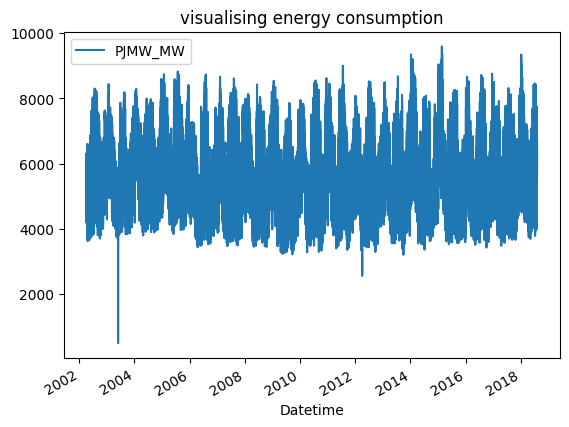

In [7]:
df.plot(title="visualising energy consumption")

In [30]:
df.query('PJMW_MW<3700')

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1
Datetime,,,,,,,,,
2002-09-29 05:00:00,3699.0,3700.0,5,2002,272,9,6,39,3721.0
2002-05-12 04:00:00,3689.0,3717.0,4,2002,132,5,6,19,3788.0
2002-05-12 05:00:00,3644.0,3689.0,5,2002,132,5,6,19,3717.0
2002-05-12 06:00:00,3674.0,3644.0,6,2002,132,5,6,19,3689.0
2002-04-21 03:00:00,3643.0,3799.0,3,2002,111,4,6,16,4012.0
...,...,...,...,...,...,...,...,...,...
2017-04-15 02:00:00,3690.0,3851.0,2,2017,105,4,5,15,4104.0
2017-04-15 03:00:00,3641.0,3690.0,3,2017,105,4,5,15,3851.0
2017-04-15 04:00:00,3610.0,3641.0,4,2017,105,4,5,15,3690.0


In [31]:
df=df.query('PJMW_MW>3700')

<AxesSubplot:xlabel='Datetime'>

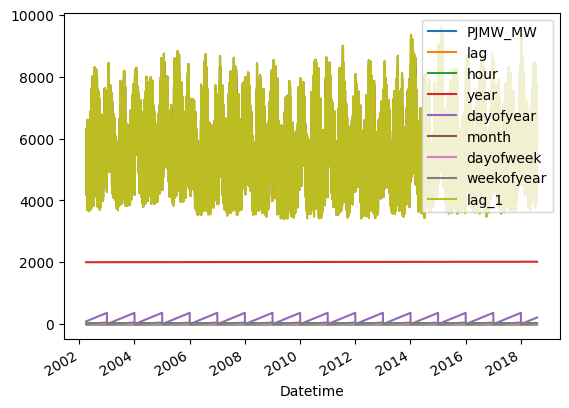

In [32]:
df.plot()

c:\Users\Hp\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:52: UserWarning: Parsing '20-08-2003' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  return self._cmp_method(other, operator.le)


<AxesSubplot:title={'center':"energy consumption between '01-08-2003' and '20-08-2003' "}, xlabel='Datetime'>

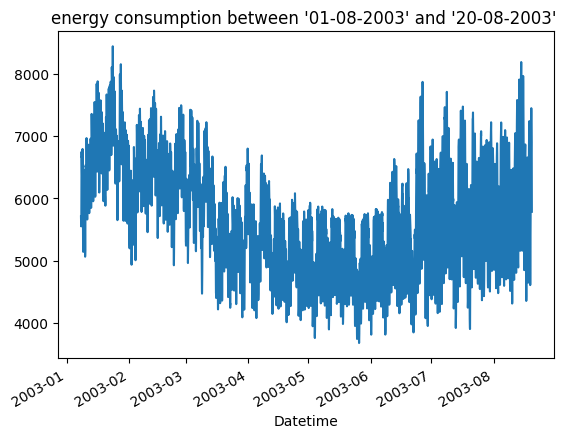

In [11]:
df['PJMW_MW'][(df.index>'01-08-2003')&(df.index<="20-08-2003")].plot(title="energy consumption between '01-08-2003' and '20-08-2003' ")

In [33]:
df['lag']=df['PJMW_MW'].shift(1)
df.head()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1
Datetime,,,,,,,,,
2002-12-31 03:00:00,4885.0,NaN,3,2002,365,12,1,1,5077.0
2002-12-31 04:00:00,4857.0,4885.0,4,2002,365,12,1,1,4939.0
2002-12-31 05:00:00,4930.0,4857.0,5,2002,365,12,1,1,4885.0
2002-12-31 06:00:00,5126.0,4930.0,6,2002,365,12,1,1,4857.0
2002-12-31 07:00:00,5493.0,5126.0,7,2002,365,12,1,1,4930.0


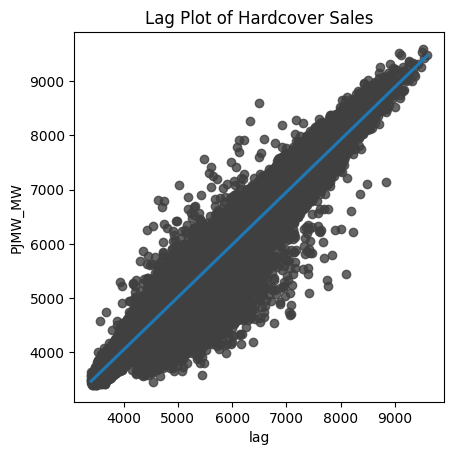

In [13]:
fig, ax = plt.subplots()
ax = sns.regplot(x='lag', y='PJMW_MW', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot of Hardcover Sales');

lag et PJMW_MW sont bien corrélé du coup lag peut servir comme feature par la suite 

# Create Features

In [61]:
def create_features(df):
    df['hour']=df.index.hour
    df['year']=df.index.year
    df['dayofyear']=df.index.dayofyear
    df['month']=df.index.month
    df['dayofweek']=df.index.dayofweek
    df['weekofyear'] = df.index.isocalendar().week
    df['lag_1']=df['PJMW_MW'].shift(1)
    return df



In [15]:
df=create_features(df)

In [16]:
df.head()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1
Datetime,,,,,,,,,
2002-12-31 01:00:00,5077.0,NaN,1,2002,365,12,1,1,NaN
2002-12-31 02:00:00,4939.0,5077.0,2,2002,365,12,1,1,NaN
2002-12-31 03:00:00,4885.0,4939.0,3,2002,365,12,1,1,5077.0
2002-12-31 04:00:00,4857.0,4885.0,4,2002,365,12,1,1,4939.0
2002-12-31 05:00:00,4930.0,4857.0,5,2002,365,12,1,1,4885.0


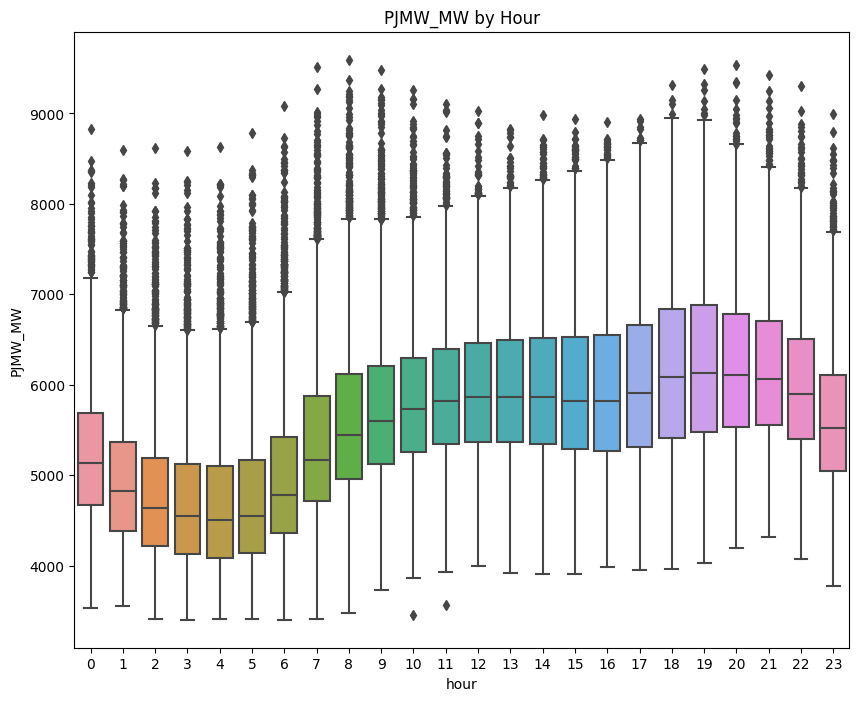

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hour', y='PJMW_MW')
ax.set_title('PJMW_MW by Hour')
plt.show()

in the first hours of the day energy consumption is low

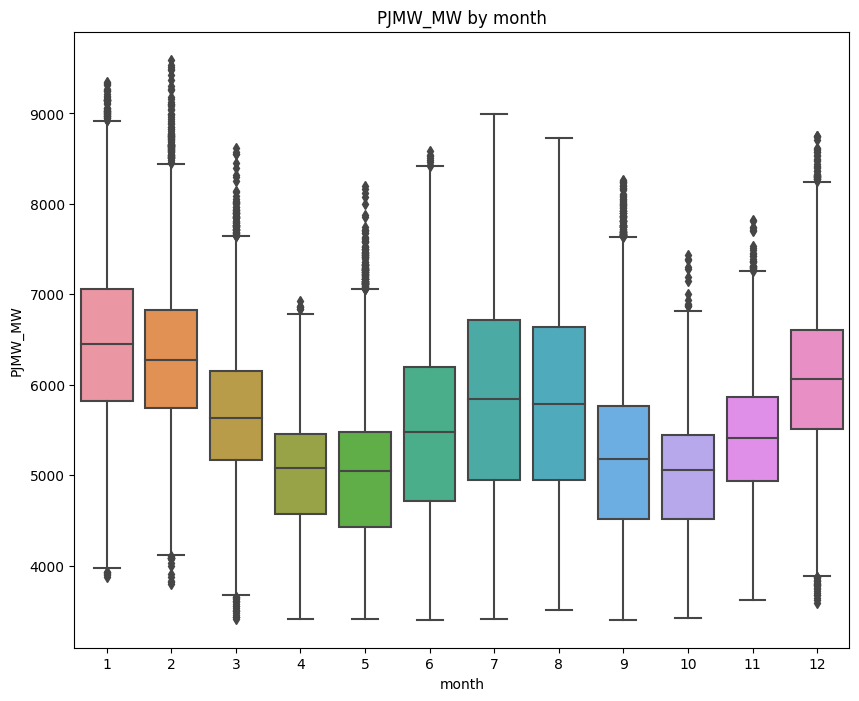

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='month', y='PJMW_MW')
ax.set_title('PJMW_MW by month')
plt.show()

# Time Series Cross Validation

In [19]:
df.columns
df=df.dropna()
df.head()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1
Datetime,,,,,,,,,
2002-12-31 03:00:00,4885.0,4939.0,3,2002,365,12,1,1,5077.0
2002-12-31 04:00:00,4857.0,4885.0,4,2002,365,12,1,1,4939.0
2002-12-31 05:00:00,4930.0,4857.0,5,2002,365,12,1,1,4885.0
2002-12-31 06:00:00,5126.0,4930.0,6,2002,365,12,1,1,4857.0
2002-12-31 07:00:00,5493.0,5126.0,7,2002,365,12,1,1,4930.0


In [34]:
from sklearn.model_selection import TimeSeriesSplit

In [35]:
tss=TimeSeriesSplit(n_splits=5,test_size=24*365*1,gap=24)
# the gap is referring to time between the train and test datasets
df=df.sort_index()


In [39]:
for train_idx, test_idx in tss.split(df):
    print(train_idx)

[    0     1     2 ... 98243 98244 98245]
[     0      1      2 ... 107003 107004 107005]
[     0      1      2 ... 115763 115764 115765]
[     0      1      2 ... 124523 124524 124525]
[     0      1      2 ... 133283 133284 133285]


In [43]:
df.head()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1
Datetime,,,,,,,,,
2002-04-01 01:00:00,4374.0,4694.0,1,2002,91,4,0,14,5017.0
2002-04-01 02:00:00,4306.0,4374.0,2,2002,91,4,0,14,4694.0
2002-04-01 03:00:00,4322.0,4306.0,3,2002,91,4,0,14,4374.0
2002-04-01 04:00:00,4359.0,4322.0,4,2002,91,4,0,14,4306.0
2002-04-01 05:00:00,4436.0,4359.0,5,2002,91,4,0,14,4322.0


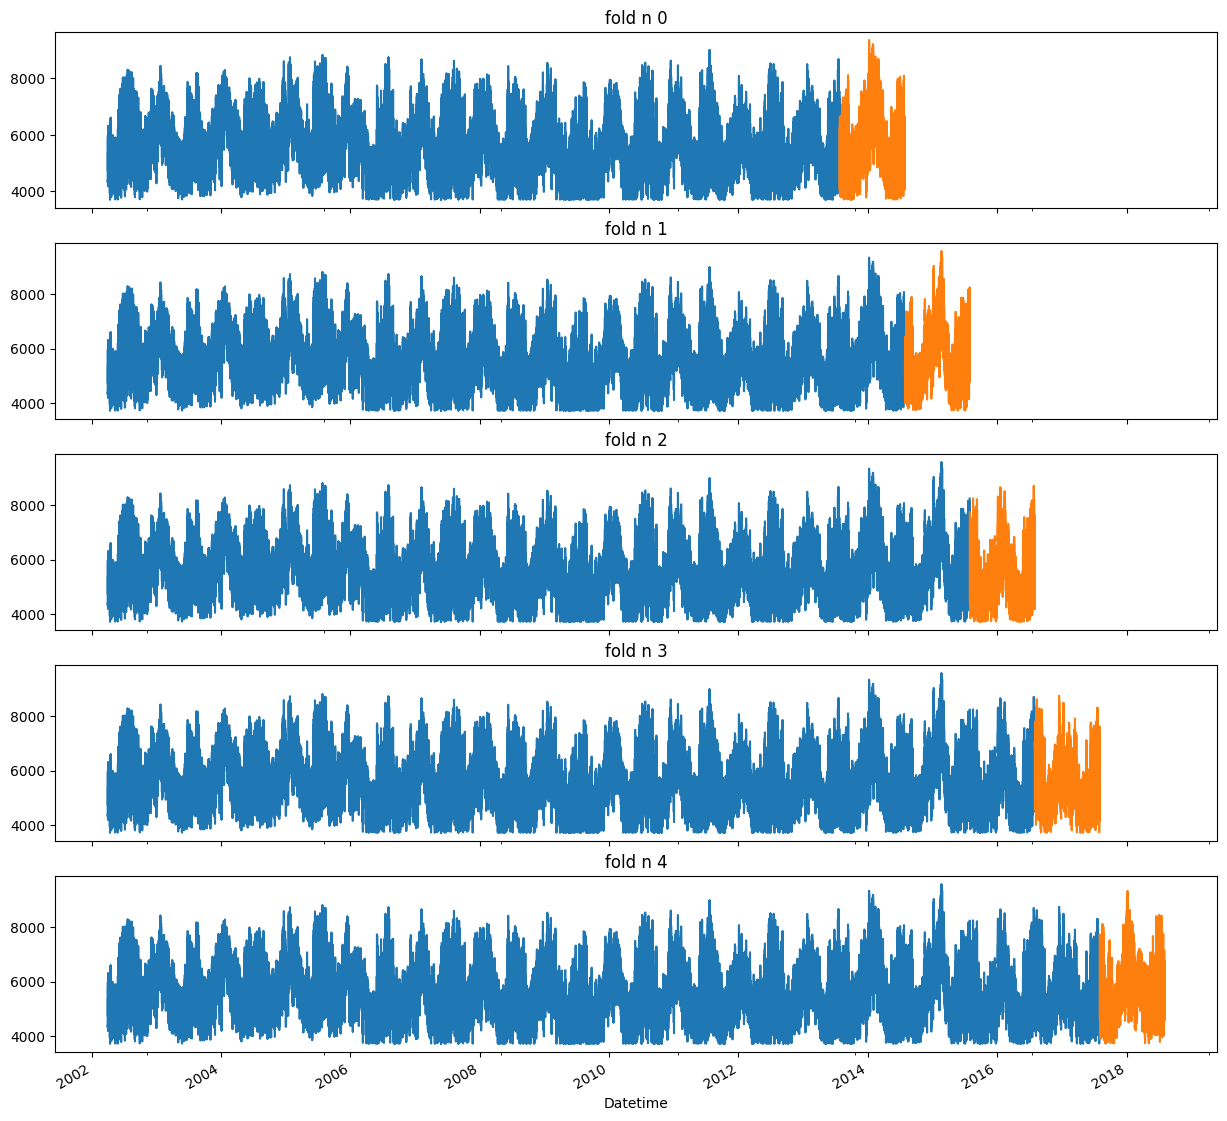

In [46]:
fig,axs=plt.subplots(5,1,figsize=(15,15),sharex=True)
fold=0
for train_idx,test_idx in tss.split(df):
    train=df.iloc[train_idx]
    test=df.iloc[test_idx]
    train['PJMW_MW'].plot(title=f'fold n {fold}',ax=axs[fold],label='trainning set')
    test['PJMW_MW'].plot(ax=axs[fold],label="test set")
    fold+=1

In [86]:
features=['lag_1','hour','month','year','dayofyear']

In [87]:
X_train=train[features]
y_train=train['PJMW_MW']
X_test=test[features]
y_test=test['PJMW_MW']

In [88]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[16:54:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0fdc6d574b9c0d168-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5637.97153	validation_1-rmse:5732.20760
[100]	validation_0-rmse:2093.39214	validation_1-rmse:2143.69150
[200]	validation_0-rmse:825.10203	validation_1-rmse:858.61739
[300]	validation_0-rmse:407.46074	validation_1-rmse:433.01639
[400]	validation_0-rmse:296.50348	validation_1-rmse:316.71415
[500]	validation_0-rmse:269.53417	validation_1-rmse:286.98174
[600]	validation_0-rmse:258.14650	validation_1-rmse:276.00893
[700]	validation_0-rmse:250.64611	validation_1-rmse:269.68960
[800]	validation_0-rmse:244.25004	validation_1-rmse:264.50997
[900]	validation_0-rmse:239.77256	validation_1-rmse:261.13608
[999]	validation_0-rmse:235.85875	validation_1-rmse:258.06845


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:linear', predictor=None, ...)

In [160]:
from sklearn.metrics import mean_squared_error
y_pred=reg.predict(X_test)
score = np.sqrt(mean_squared_error(y_test,y_pred ))
print(f'RMSE Score on Test set: {score:0.2f}')


RMSE Score on Test set: 258.07


In [161]:
print('the mean value of y_test is:', y_test.mean())
print('the median value of y_test is:', y_test.median())

the mean value of y_test is: 5704.29794520548
the median value of y_test is: 5616.0


In [162]:
print('the pourcentage of the error with reference to the mean value',(score/ y_test.mean())*100,"%")

the pourcentage of the error with reference to the mean value 4.524105460751463 %


the mean_squared error is accepeted in comparaison with the mean value is acceptable

create future dataframe

In [48]:
df.index.max()

Timestamp('2018-08-03 00:00:00')

In [98]:
futur=pd.date_range('2018-08-03 01:00:00','2019-08-03',freq='1h') # we want a frequency of one hour because the original data frame is incremented by one hour
futur_df=pd.DataFrame(index=futur)

In [99]:
futur_df.head()

""
2018-08-03 01:00:00
2018-08-03 02:00:00
2018-08-03 03:00:00
2018-08-03 04:00:00
2018-08-03 05:00:00


create dataframe with the past data and futur data

In [125]:
futur_df['is_it_futur']=True

In [126]:
#vérification
futur_df.head()

,is_it_futur
2018-08-03 01:00:00,True
2018-08-03 02:00:00,True
2018-08-03 03:00:00,True
2018-08-03 04:00:00,True
2018-08-03 05:00:00,True


In [127]:
df['is_it_futur']=False

In [129]:
concat_data=pd.concat([df,futur_df])

In [130]:
concat_data.head()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1,is_it_futur
2002-04-01 01:00:00,4374.0,4694.0,1.0,2002.0,91.0,4.0,0.0,14,5017.0,False
2002-04-01 02:00:00,4306.0,4374.0,2.0,2002.0,91.0,4.0,0.0,14,4694.0,False
2002-04-01 03:00:00,4322.0,4306.0,3.0,2002.0,91.0,4.0,0.0,14,4374.0,False
2002-04-01 04:00:00,4359.0,4322.0,4.0,2002.0,91.0,4.0,0.0,14,4306.0,False
2002-04-01 05:00:00,4436.0,4359.0,5.0,2002.0,91.0,4.0,0.0,14,4322.0,False


In [131]:
concat_data.tail()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1,is_it_futur
2019-08-02 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True
2019-08-02 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True
2019-08-02 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True
2019-08-02 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True
2019-08-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,True


fill the new rows 

In [132]:
concat_data=create_features(concat_data)

simple verification

In [104]:
df.index.max()

Timestamp('2018-08-03 00:00:00')

get futur data with features

In [136]:
data_to_predict=concat_data.query('is_it_futur==True')

In [144]:

features

['lag_1', 'hour', 'month', 'year', 'dayofyear']

In [137]:
future_database=data_to_predict.copy()

on prédit alors les valeurs futurs tout en remplissant aussi la case lag_1 qui sera utile pour la prediction qui suit

In [158]:
for index, row in future_database.iterrows():
    predicted_value_PMJW=reg.predict(future_database.loc[[index]][features])[0]
    future_database.loc[index, 'PJMW_MW'] =predicted_value_PMJW
    future_database=create_features(future_database)

    

        
        



voila donc les prédictions des dates futures 

In [159]:
future_database.head()

,PJMW_MW,lag,hour,year,dayofyear,month,dayofweek,weekofyear,lag_1,is_it_futur
2018-08-03 01:00:00,4766.580078,NaN,1,2018,215,8,4,31,NaN,True
2018-08-03 02:00:00,4388.990234,NaN,2,2018,215,8,4,31,4766.580078,True
2018-08-03 03:00:00,4144.791016,NaN,3,2018,215,8,4,31,4388.990234,True
2018-08-03 04:00:00,4012.500244,NaN,4,2018,215,8,4,31,4144.791016,True
2018-08-03 05:00:00,3963.927979,NaN,5,2018,215,8,4,31,4012.500244,True
